# Jupyter Notebook for analysing and visualizing results for PPO hyperparameter optimization

## Analysing Optuna study results

- See possible visualizations for hyperparameter optimization analysis here: https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/005_visualization.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import pickle

# plotly visualizations
# from optuna.visualization import plot_contour, plot_edf, plot_intermediate_values, \
#     plot_optimization_history, plot_parallel_coordinate, plot_param_importances, plot_rank, \
#     plot_slice, plot_timeline, plot_terminator_improvement, plot_pareto_front

# matplotlib visualizations
from optuna.visualization.matplotlib import plot_contour, plot_edf, plot_intermediate_values, \
    plot_optimization_history, plot_parallel_coordinate, plot_param_importances, plot_rank, \
    plot_slice, plot_timeline, plot_terminator_improvement, plot_pareto_front

If you want to store figures as .pdfm then uncomment the following cell:



In [ ]:
# import matplotlib

# # set if plots should be stored as .pgf for latex integration
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [2]:
# open the .pkl file for the BO study with GP
with open('../results/report_PongNoFrameskip-v4_50-trials-500000-gp-none_1738779572.pkl', 'rb') as f:
    gp_study = pickle.load(f)

# open the .pkl file for the random study
with open('../results/report_PongNoFrameskip-v4_50-trials-500000-random-none_1738688216.pkl', 'rb') as f:
    random_study = pickle.load(f)

Investigation of hyperparameter value selection (for GP results):

- Any striking patterns with regard to the selection of hyperparameter values?
    - clip_range remained steady after trial 15 with 0.3 (could be explained by the fact that trial showed the best results so far with -2.2, and here it was 0.3 as well)
    - batch_size also remained steady after trial 15 with 32 (for same reason)
    - gae_lambda the same with 0.95
    - for activation_fn: tanh from trial 15 to 42 and then elu for the remaining ones
    - varying ent_coef
    - gamma 0.95 from trial to 15 to 43 and then changed values
    - varying learning_rate
    - max_grad_norm 0.3 (also due to trial 11) from trial 15 to 44
    - n_epochs with 3 after trial 14 to remaining ones (also due to 11)
    - n_steps 1024 after trial 15 with some exploration to other number (due to 11)
    - net_arch - medium_pi also due to 11
    - ortho_init - almost always False
    - exploration of vf_coef similar to ent_coef


- So basically after trial 11 major changes in hyperparameer values could only be seen for the learning rate, ent_coef and vf_coef (all continuous factors for BO) with same initial exploring of other factors (would probably require a higher amount of trials, as it gives an indication of a local optimum)
    - striking pattern is that the learning rate values decrease for trials at a later stage (gives an indication that reducing the initial learning rate reduces the objective value or mean reward)
    - Could use slice plot to reveal this
    - Perhaps use contour plot for selected hyperparameters (in particular vf_coef and the learning_rate)
    

### Optimization history

- simply plots the optimization history of all trials conducted after each trial


Analysis of GP history plot

- Initial random trials, then when further optimizing improved candidates have been found (between 20 and 30 trials)
- Then decreasing objective value up to trial 50 (indication of possible local optimum but hard to determine due to limitation of trials - would require additional number of trials up to 500 and also with increased number of timesteps)
- Best trials after initial optimizing progress


Analysis of random history plot

- Results signifacntly worse than GP results
- Even best result is worse than almost 20% of the best GP results
- No pattern in objective value - just randomly picking of trials


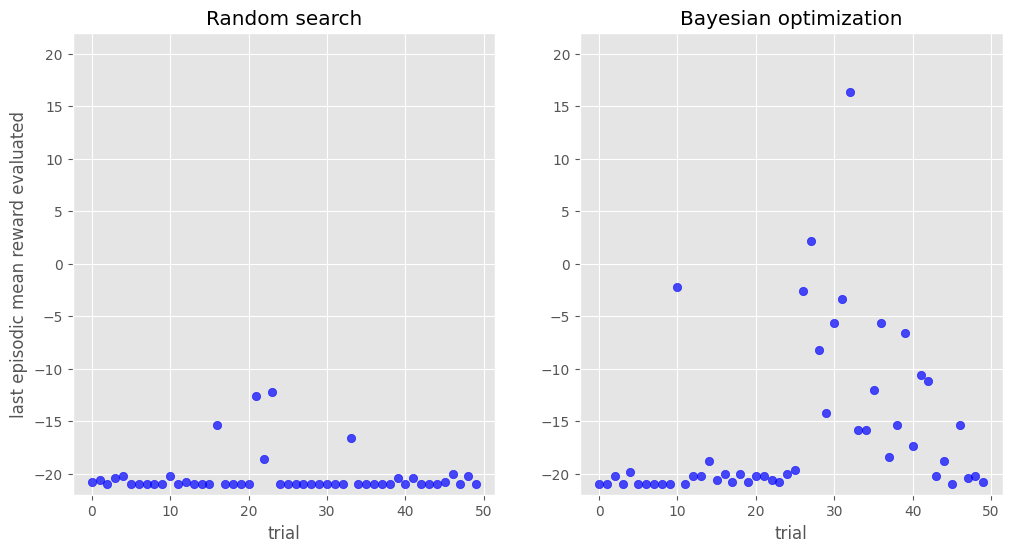

In [234]:
# optimization history manually based on .csv file 

# open .csv file with study results
df_study_random = pd.read_csv('seed/report_PongNoFrameskip-v4_50-trials-500000-random-none_1738688216.csv')
df_study_gp = pd.read_csv('seed/report_PongNoFrameskip-v4_50-trials-500000-gp-none_1738779572.csv')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


# Plot mean reward over timesteps
ax1.scatter(df_study_random["number"], df_study_random["value"], color='blue', alpha=0.7, label="mean reward")
ax1.set_xlabel("trial")
ax1.set_ylabel("last episodic mean reward evaluated")
ax1.set_title("Random search")
ax1.set_ylim(-22, 22)
ax1.grid(True)

# Plot mean reward over timesteps
ax2.scatter(df_study_gp["number"], df_study_gp["value"], color='blue', alpha=0.7, label="mean reward")
ax2.set_xlabel("trial")
# ax2.set_ylabel("last episodic mean reward evaluated")
ax2.set_title("Bayesian optimization")
ax2.set_ylim(-22, 22)
ax2.grid(True)

fig.savefig("optimization_history_both.pdf", format="pdf", bbox_inches="tight")

C:\Users\peter\AppData\Local\Temp\ipykernel_11816\984897979.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optimization_history_random = plot_optimization_history(random_study)


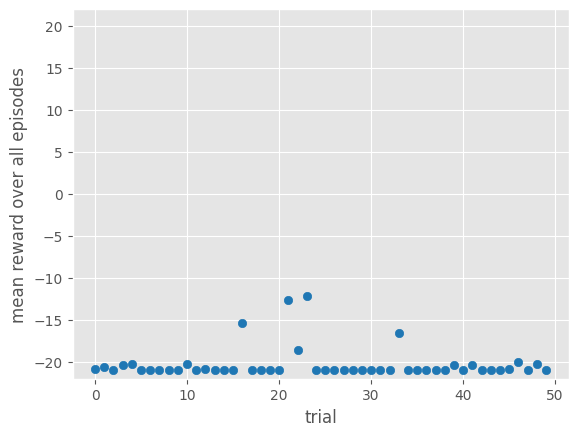

In [208]:
optimization_history_random = plot_optimization_history(random_study)
optimization_history_random.get_lines()[0].remove()
optimization_history_random.set_ylim(-22, 22)
optimization_history_random.set_xlabel('trial')
optimization_history_random.set_ylabel('mean reward over all episodes')
optimization_history_random.set_title('')
optimization_history_random.get_legend().remove()

# # matplotlib pdf saving
optimization_history_random.figure.savefig("optimization_history_random.pdf", format="pdf", bbox_inches="tight")

C:\Users\peter\AppData\Local\Temp\ipykernel_11816\3351417484.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optimization_history_gp = plot_optimization_history(gp_study)


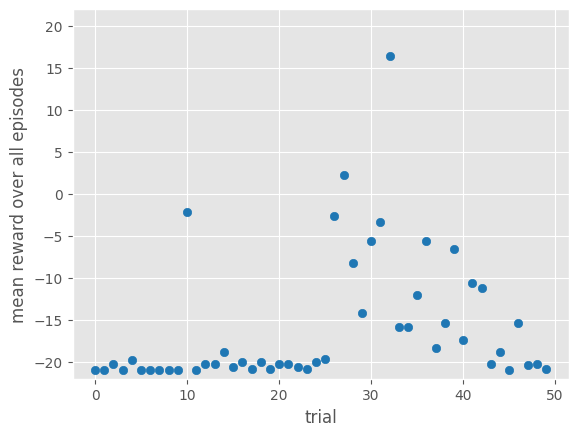

In [209]:
optimization_history_gp = plot_optimization_history(gp_study)
optimization_history_gp.get_lines()[0].remove()
optimization_history_gp.set_ylim(-22, 22)
optimization_history_gp.set_xlabel('trial')
optimization_history_gp.set_ylabel('mean reward over all episodes')
optimization_history_gp.set_title('')
optimization_history_gp.get_legend().remove()

# # matplotlib pdf saving
optimization_history_gp.figure.savefig("optimization_history_gp.pdf", format="pdf", bbox_inches="tight")

### Hyperparameter importances

- see https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_param_importances.html#sphx-glr-reference-visualization-generated-optuna-visualization-plot-param-importances-py

- Uses this function https://optuna.readthedocs.io/en/stable/reference/generated/optuna.importance.get_param_importances.html#optuna.importance.get_param_importances to determine the hyperparameter importances

- Higher values indicate higher importance, by default the sum of the importance values is normalized to 1.0

- Uses a specific evaluator "FanovaImportanceEvaluator" - fANOVA fits a random forest regression model that predicts the objective values of completed trials given their parameter configurations (the more accurate this model is, the more reliable the importances assessed this class are)

- Implementation based on this paper https://proceedings.mlr.press/v32/hutter14.html

C:\Users\peter\AppData\Local\Temp\ipykernel_11816\3214030215.py:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  param_importances_random = plot_param_importances(random_study)


<Axes: xlabel='normalized hyperparameter performance measure', ylabel='hyperparameter'>

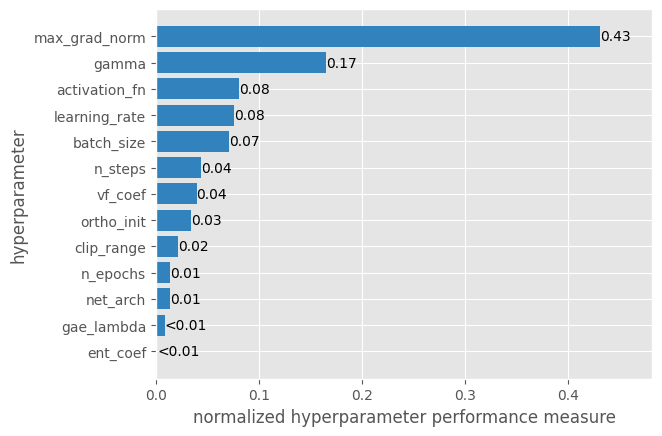

In [112]:
# hyperparameter importances random search
param_importances_random = plot_param_importances(random_study)
param_importances_random.set_title(label='', loc='left')
param_importances_random.set_xlabel('normalized hyperparameter performance measure')
param_importances_random.set_ylabel('hyperparameter')
param_importances_random.get_legend().remove()
param_importances_random

C:\Users\peter\AppData\Local\Temp\ipykernel_11816\3265113524.py:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  param_importances_gp = plot_param_importances(gp_study)


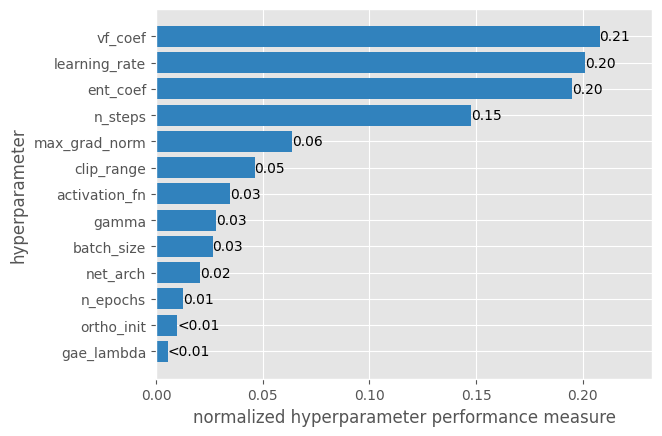

In [210]:
# hyperparameter importances bayesian optimization
param_importances_gp = plot_param_importances(gp_study)
param_importances_gp.set_title(label='', loc='left')
param_importances_gp.set_xlabel('normalized hyperparameter performance measure')
param_importances_gp.set_ylabel('hyperparameter')
param_importances_gp.get_legend().remove()
param_importances_gp

# # matplotlib pdf saving
param_importances_gp.figure.savefig("param_importances_gp.pdf", format="pdf", bbox_inches="tight")

Store plot as .pdf

In [8]:
# store figurea as .pgf image
# fig = vis.get_figure()

# # matplotlib pdf saving
# fig.savefig("figurematplot.pdf", format="pdf", bbox_inches="tight")

# fig.savefig("bo_hyperparam_importance.pgf")

In [1]:
# plot hyperparameter importances with regard to a specific target (here e.g. the duration)
# plot_param_importances(
#     study, target=lambda t: t.duration.total_seconds(), target_name="duration"
# )

### Plot rank

- See here: https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_rank.html#sphx-glr-reference-visualization-generated-optuna-visualization-plot-rank-py

- Plots the parameter relations as scatter plots with colors indicating ranks of target value

In [18]:
# plot_rank(gp_study, params=["learning_rate", "vf_coef"])

### Slice plot

- see https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_slice.html#sphx-glr-reference-visualization-generated-optuna-visualization-plot-slice-py

- plots parameters relationships as a slice plot in a study

C:\Users\peter\AppData\Local\Temp\ipykernel_22052\2878275989.py:2: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  slice_plot_gp = plot_slice(gp_study, params=["learning_rate", "ent_coef", "vf_coef"], target_name='last episodic mean reward evaluated')


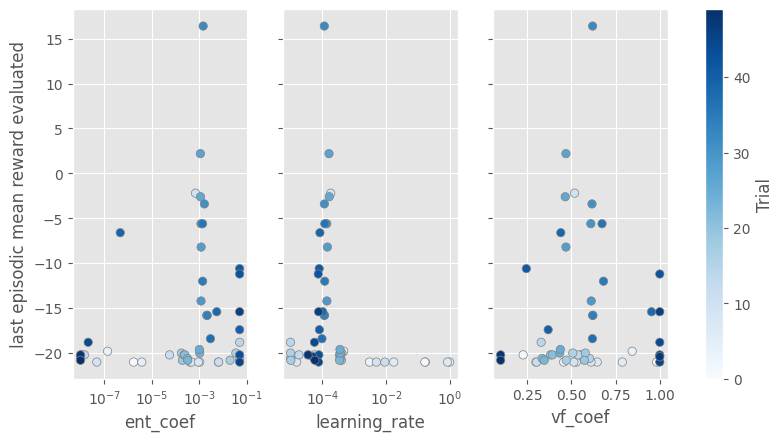

In [6]:
# slice plot for BO
slice_plot_gp = plot_slice(gp_study, params=["learning_rate", "ent_coef", "vf_coef"], target_name='last episodic mean reward evaluated')
slice_plot_gp[0].figure.suptitle('')
# slice_plot_gp[0].figure.colorbar(slice_plot_gp[2].collections[0]).set_label('trial')
# slice_plot_gp[1].figure.colorbar(slice_plot_gp[-1].collections[0]).set_label('trial')
# slice_plot_gp[2].figure.colorbar(slice_plot_gp[-1].collections[0]).set_label('trial')
slice_plot_gp

slice_plot_gp[0].figure.savefig("slice_plot_gp.pdf", format="pdf", bbox_inches="tight")



### Parallel coordinate plot

- See https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_parallel_coordinate.html#sphx-glr-reference-visualization-generated-optuna-visualization-plot-parallel-coordinate-py

- plots the high-dimensional parameter relationships in a study

In [13]:
# plot_parallel_coordinate(gp_study, params=["gamma", "ent_coef", "vf_coef"])

### Contour plot

- see https://optuna.readthedocs.io/en/stable/reference/visualization/generated/optuna.visualization.plot_contour.html#sphx-glr-reference-visualization-generated-optuna-visualization-plot-contour-py
- plots the parameter relationships as contour plot in a study

C:\Users\peter\AppData\Local\Temp\ipykernel_11816\1416006544.py:1: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  contour_plot_gp = plot_contour(gp_study, params=["vf_coef", "learning_rate"], target_name='mean reward over all episodes')
[W 2025-02-13 17:28:04,912] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


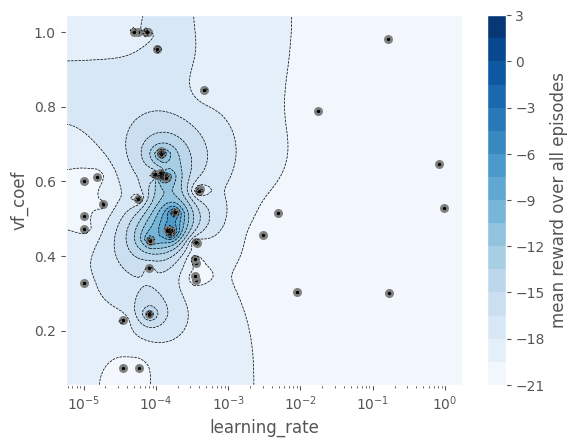

In [213]:
contour_plot_gp = plot_contour(gp_study, params=["vf_coef", "learning_rate"], target_name='mean reward over all episodes')
contour_plot_gp.set_title('', loc='center')
contour_plot_gp

contour_plot_gp.figure.savefig("countour_plot_gp.pdf", format="pdf", bbox_inches="tight")

C:\Users\peter\AppData\Local\Temp\ipykernel_11816\723402587.py:1: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  plot_contour(gp_study, params=["ent_coef", "learning_rate"])
[W 2025-02-13 13:04:34,132] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


<Axes: title={'center': 'Contour Plot'}, xlabel='ent_coef', ylabel='learning_rate'>

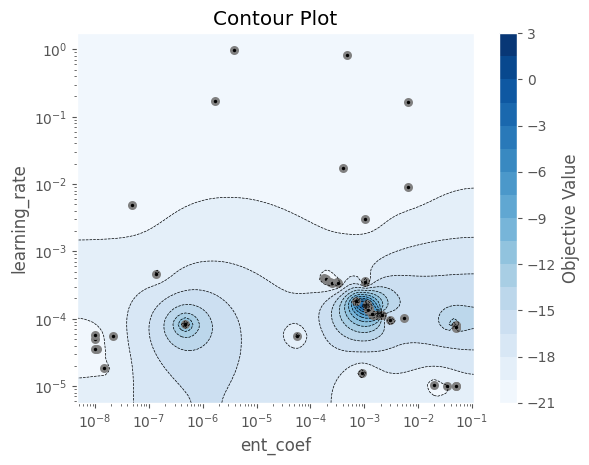

In [113]:
plot_contour(gp_study, params=["ent_coef", "learning_rate"])

## Analysing best runs in detail for BO and random search

- Evaluate mean reward over time for comparison of BO and random search - do the same for episodic length to show the correlation (subplots in comparison for random and BO)
- Determine mean reward of last 100 episodes to put result into context of state-of-the-art results

Visualize both best results with mean reward:

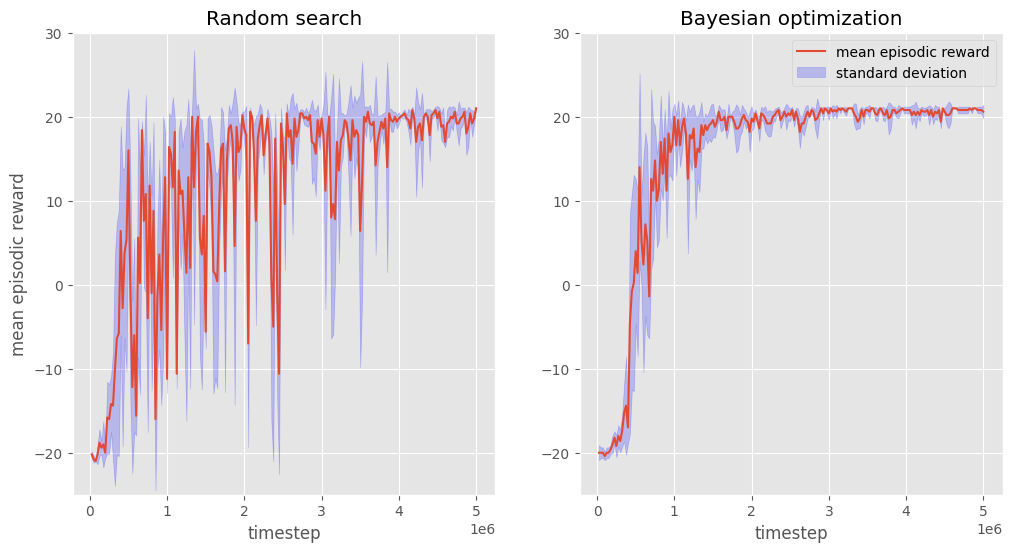

In [222]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# load the evaluations.npz files
evaluations_data_gp = np.load("seed/gp-PongNoFrameskip-v4_21/evaluations.npz")
evaluations_data_random = np.load("seed/random-PongNoFrameskip-v4_23/evaluations.npz")

# mean reward measured based on 5 consecutive episodes
rewards_gp = evaluations_data_gp["results"]
rewards_random = evaluations_data_random["results"]
timesteps_gp = evaluations_data_gp["timesteps"]
timesteps_random = evaluations_data_random["timesteps"]

# mean reward and standard deviation over episodes for gp
mean_rewards_gp = rewards_gp.mean(axis=1)
mean_rewards_random = rewards_random.mean(axis=1)
std_rewards_gp = rewards_gp.std(axis=1)
std_rewards_random = rewards_random.std(axis=1)


# Plot mean reward over timesteps
ax1.plot(timesteps_random, mean_rewards_random, linestyle="-", label="mean reward")
ax1.fill_between(timesteps_random, mean_rewards_random - std_rewards_random,
                 mean_rewards_random + std_rewards_random, color='blue', alpha=0.2, label="standard deviation")

ax1.set_xlabel("timestep")
ax1.set_ylabel("mean episodic reward")
ax1.set_title("Random search")
ax1.set_ylim(-25, 30)
# ax1.legend()
ax1.grid(True)

# Plot mean reward over timesteps
ax2.plot(timesteps_gp, mean_rewards_gp, linestyle="-", label="mean episodic reward")
ax2.fill_between(timesteps_gp, mean_rewards_gp - std_rewards_gp,
                 mean_rewards_gp + std_rewards_gp, color='blue', alpha=0.2, label="standard deviation")

ax2.set_xlabel("timestep")
# ax2.set_ylabel("mean episodic reward")
ax2.set_title("Bayesian optimization")
ax2.set_ylim(-25, 30)
ax2.legend()
ax2.grid(True)

fig.savefig("mean_episodic_reward_best.pdf", format="pdf", bbox_inches="tight")

Visualize both best results mean episodic lengths:

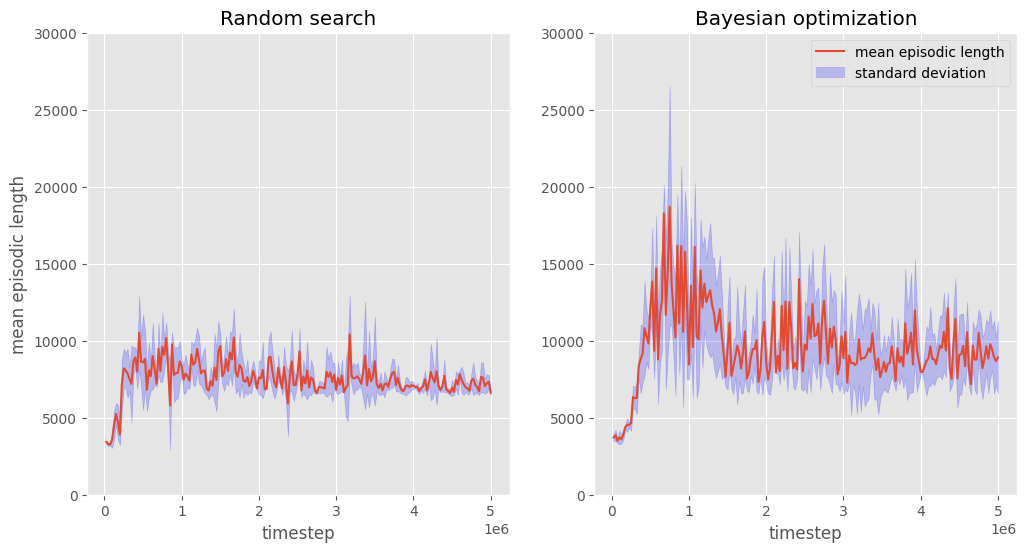

In [223]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# load the evaluations.npz files
evaluations_data_gp = np.load("seed/gp-PongNoFrameskip-v4_21/evaluations.npz")
evaluations_data_random = np.load("seed/random-PongNoFrameskip-v4_23/evaluations.npz")

# mean episodic length measured based on 5 consecutive episodes
ep_lengths_gp = evaluations_data_gp["ep_lengths"]
ep_lengths_random = evaluations_data_random["ep_lengths"]
timesteps_gp = evaluations_data_gp["timesteps"]
timesteps_random = evaluations_data_random["timesteps"]

# mean reward and standard deviation over episodes for gp
mean_ep_length_gp = ep_lengths_gp.mean(axis=1)
mean_ep_length_random = ep_lengths_random.mean(axis=1)
std_ep_length_gp = ep_lengths_gp.std(axis=1)
std_ep_length_random = ep_lengths_random.std(axis=1)


# Plot mean reward over timesteps
ax1.plot(timesteps_random, mean_ep_length_random, linestyle="-", label="mean episodic length")
ax1.fill_between(timesteps_random, mean_ep_length_random - std_ep_length_random,
                 mean_ep_length_random + std_ep_length_random, color='blue', alpha=0.2, label="standard deviation")

ax1.set_xlabel("timestep")
ax1.set_ylabel("mean episodic length")
ax1.set_title("Random search")
ax1.set_ylim(0, 30000)
# ax1.legend()
ax1.grid(True)

# Plot mean reward over timesteps
ax2.plot(timesteps_gp, mean_ep_length_gp, linestyle="-", label="mean episodic length")
ax2.fill_between(timesteps_gp, mean_ep_length_gp - std_ep_length_gp,
                 mean_ep_length_gp + std_ep_length_gp, color='blue', alpha=0.2, label="standard deviation")

ax2.set_xlabel("timestep")
# ax2.set_ylabel("mean episodic reward")
ax2.set_title("Bayesian optimization")
ax2.set_ylim(0, 30000)
ax2.legend()
ax2.grid(True)

fig.savefig("mean_episodic_length_best.pdf", format="pdf", bbox_inches="tight")

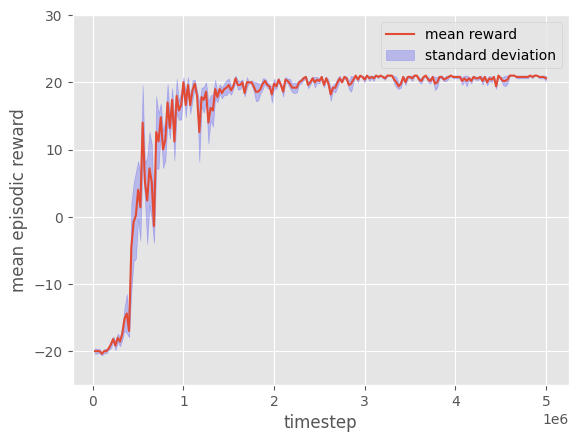

In [167]:
# use evaluations.npz file for BO

# Load the evaluations.npz file
evaluations_data_gp = np.load("seed/gp-PongNoFrameskip-v4_21/evaluations.npz")

# Extract episode rewards (usually stored as 'results')


# mean reward measured based on 5 consecutive episodes with overlapping windows (2)
rewards = evaluations_data_gp["results"]  # Shape: (num_evaluations, num_episodes_per_eval)
timesteps = evaluations_data_gp["timesteps"]  # Timesteps corresponding to evaluations

# Compute mean reward per evaluation
mean_rewards = rewards.mean(axis=1)

std_rewards = rewards.std(axis=1)

# Plot mean reward over timesteps
plt.plot(timesteps, mean_rewards, linestyle="-", label="mean reward")
plt.fill_between(timesteps, mean_rewards - std_rewards / 2, mean_rewards + std_rewards / 2, color='blue', alpha=0.2, label="standard deviation")

plt.xlabel("timestep")
plt.ylabel("mean episodic reward")
plt.ylim(-25, 30)
# plt.title("Mean Reward over Time")
plt.legend()
plt.grid(True)
plt.show()


In [169]:
# mean reward over last 100 episodes used for evaluation
rewards[-20:].mean()

np.float64(20.77)

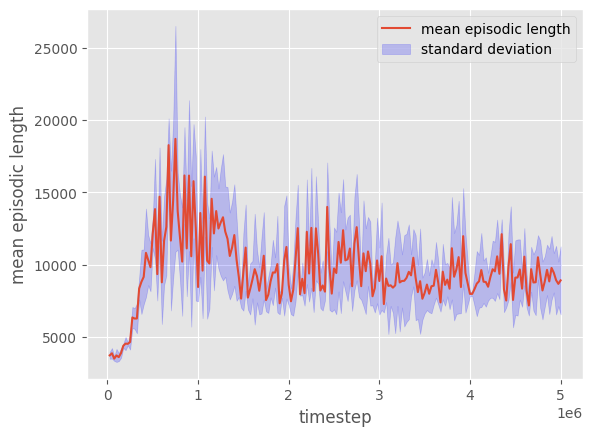

In [152]:
# mean episodic length measured based on 5 consecutive episodes with overlapping windows (2)
ep_lengths = evaluations_data_gp["ep_lengths"]  # Shape: (num_evaluations, num_episodes_per_eval)
timesteps = evaluations_data_gp["timesteps"]  # Timesteps corresponding to evaluations

# Compute mean reward per evaluation
mean_eps_length= ep_lengths.mean(axis=1)

std_ep_lengths = ep_lengths.std(axis=1)

# Plot mean reward over timesteps
plt.plot(timesteps, mean_eps_length, linestyle="-", label="mean episodic length")
plt.fill_between(timesteps, mean_eps_length - std_ep_lengths, mean_eps_length + std_ep_lengths, color='blue', alpha=0.2, label="standard deviation")


plt.xlabel("timestep")
plt.ylabel("mean episodic length")
# plt.title("Mean Reward over Time")
plt.legend()
plt.grid(True)
plt.show()

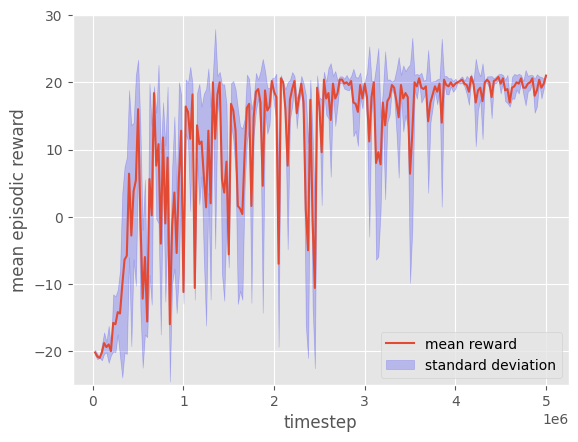

In [170]:
# use evaluations.npz file for BO

# Load the evaluations.npz file
evaluations_data_random = np.load("seed/random-PongNoFrameskip-v4_23/evaluations.npz")

# Extract episode rewards (usually stored as 'results')

# mean reward measured based on 5 consecutive episodes with overlapping windows (2)
rewards = evaluations_data_random["results"]  # Shape: (num_evaluations, num_episodes_per_eval)
timesteps = evaluations_data_random["timesteps"]  # Timesteps corresponding to evaluations

# Compute mean reward per evaluation
mean_rewards = rewards.mean(axis=1)

std_rewards = rewards.std(axis=1)

# Plot mean reward over timesteps
plt.plot(timesteps, mean_rewards, linestyle="-", label="mean reward")
plt.fill_between(timesteps, mean_rewards - std_rewards, mean_rewards + std_rewards, color='blue', alpha=0.2, label="standard deviation")
plt.ylim(-25, 30)

plt.xlabel("timestep")
plt.ylabel("mean episodic reward")
# plt.title("Mean Reward over Time")
plt.legend()
plt.grid(True)
plt.show()


In [171]:
# mean reward over last 100 episodes used for evaluation
rewards[-20:].mean()

np.float64(19.52)

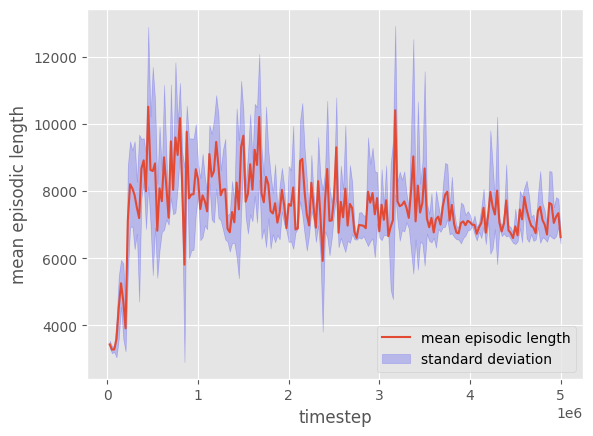

In [172]:
# mean episodic length measured based on 5 consecutive episodes with NO
ep_lengths = evaluations_data_random["ep_lengths"]  # Shape: (num_evaluations, num_episodes_per_eval)
timesteps = evaluations_data_random["timesteps"]  # Timesteps corresponding to evaluations

# Compute mean reward per evaluation
mean_eps_length= ep_lengths.mean(axis=1)

std_ep_lengths = ep_lengths.std(axis=1)

# Plot mean reward over timesteps
plt.plot(timesteps, mean_eps_length, linestyle="-", label="mean episodic length")
plt.fill_between(timesteps, mean_eps_length - std_ep_lengths, mean_eps_length + std_ep_lengths, color='blue', alpha=0.2, label="standard deviation")


plt.xlabel("timestep")
plt.ylabel("mean episodic length")
# plt.title("Mean Reward over Time")
plt.legend()
plt.grid(True)
plt.show()